# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [54]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
# TODO
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [4]:
df[pd.isnull(df).any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: TODO
The dataset has 4 variables & 400 observations with some null data

> ### Question 2.  Create a summary table.

In [5]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [ ]:
# TODO
Gre has larger variance than gpa because Gre scores can spread between 200-800 while gpa values are between 1-4

Answer: TODO

> ### Question 4.  Drop data points with missing data.

In [12]:
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [27]:
# TODO
df.dropna().shape[0]

397

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [89]:
# TODO
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [100]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [101]:
df[pd.isnull(df).any(axis=1)]

,admit,gre,gpa,prestige


Answer: TODO
The number of observation went down from 400 to 397 meaning there were 3 observations/rows have been dropped from the dataset. Earlier, row 187,212 and 236 have shown when trying to display null values. After dropping missing data, none of these rows are showing anymore. That makes me conclude it dropped the correct data.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

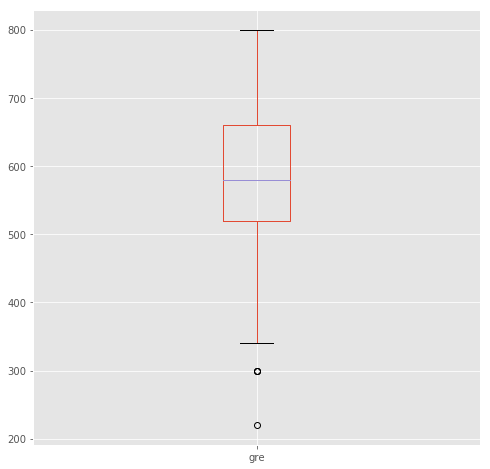

In [29]:
# TODO
df.gre.plot(kind = 'box', figsize = (8, 8))

In [42]:
df.loc[df['gre'] <= 300] #gre ouliers. 

,admit,gre,gpa,prestige
71,0,300.0,2.92,4.0
179,0,300.0,3.01,3.0
304,0,220.0,2.83,3.0
315,1,300.0,2.84,2.0


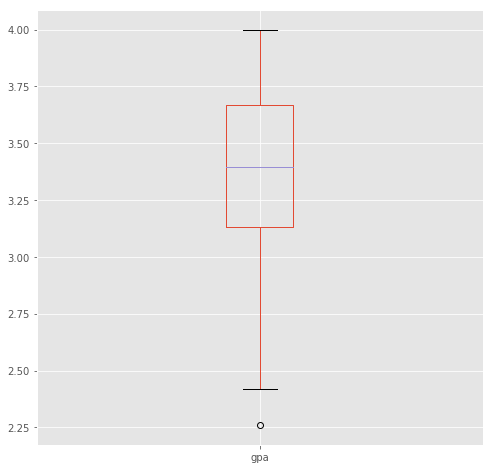

In [30]:
# TODO
df.gpa.plot(kind = 'box', figsize = (8, 8))

In [37]:
df.loc[df['gpa'] < 2.3] #gpa outlier

,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0


> ### Question 7.  What do boxplots show?

Answer: TODO
There are outliers in gre variable & gpa variable. Most of the distribution center approximately between 500 to 650 for gre & between 3.15 to 3.70 for gpa.

> ### Question 8.  Plot the distribution of each variable.

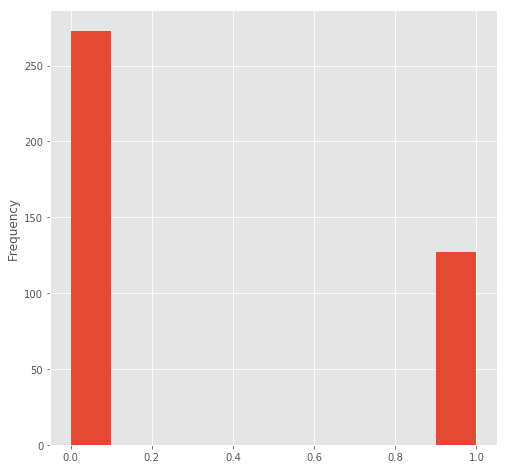

In [20]:
# TODO
df.admit.plot(kind = 'hist', figsize = (8, 8))

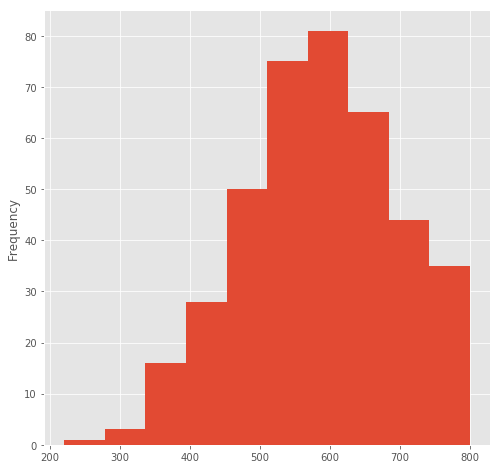

In [21]:
# TODO
df.gre.plot(kind = 'hist', figsize = (8, 8))

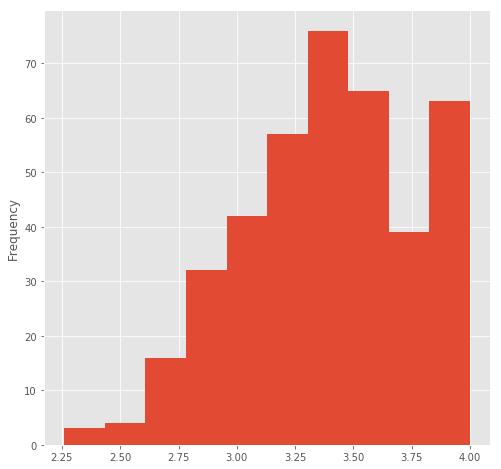

In [60]:
# TODO
df.gpa.plot(kind = 'hist', figsize = (8, 8))

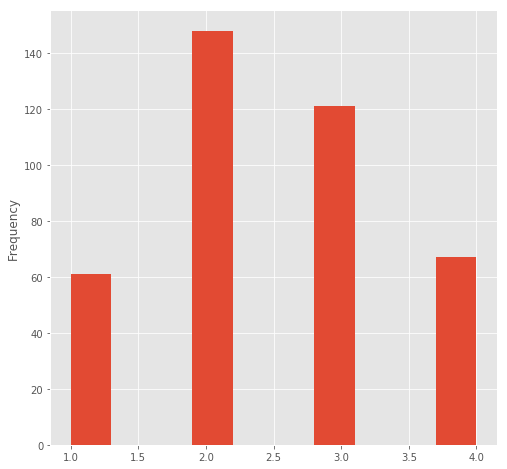

In [61]:
# TODO
df.prestige.plot(kind = 'hist', figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: TODO
If our model had an assumption of a normal distribution for gre and gpa, we would not meet that requirement. We could remove the outliers from the data set but it doesn't help to have a normal distribution (see histogram below for distribution without outliers).
I don't think we need to correct the distribution but rather group them into different groups to have deeper analysis and understand the patterns. 

In [57]:
df = df.drop(df.index[df.gre <= 300])

In [58]:
df.loc[df['gre'] <= 300]

,admit,gre,gpa,prestige


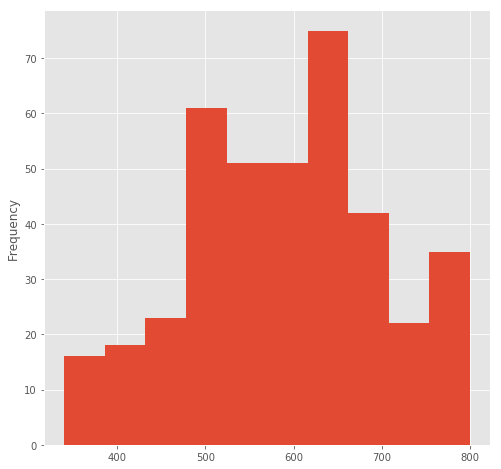

In [59]:
df.gre.plot(kind = 'hist', figsize = (8, 8))

In [60]:
df = df.drop(df.index[df.gpa < 2.3])

In [61]:
df.loc[df['gpa'] < 2.3]

,admit,gre,gpa,prestige


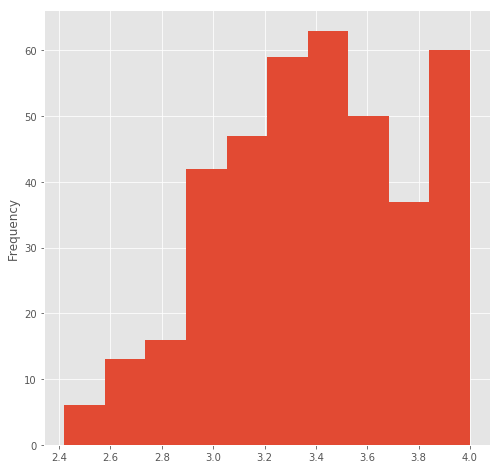

In [64]:
df.gpa.plot(kind = 'hist', figsize = (8, 8))

> ### Question 10.  Create a correlation matrix for the dataset.

In [22]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: TODO
I believe gpa & gre are potentially colinear. Students with higher gpa seems to get higher score in gre as well, with 0.38 correlation indicator.
prestige & gre also have tendency of colinear. Students from higher prestige rank shools seems to obtain higher score in gre compared to those coming from lower rank. Though, the relationship between these 2 variables are weaker compared to gpa & gre. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: TODO
Without considering other attributes such as gre & gpa, the correlation value between admit & prestige indicates the trend that students coming from higher prestige rank of undergraduate shools has higher chance to get admit

> ### Question 13.  What is your hypothesis?

Answer: TODO
The higher gre & prestige score, the higher probability to get admit